# **`KNN-3`**

`Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in
sklearn.datasets.`

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [107]:
iris = load_iris()

In [108]:
print(iris.DESCR) # description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [109]:
#separating dependent and independent features
X = iris.data # independent features
y = iris.target #target / dependent

In [110]:
#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size= 0.33 , random_state=0)

In [111]:
# Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [112]:
# Training the model
classifier.fit(X_train , y_train)

KNeighborsClassifier()

In [113]:
# prediction on test set
y_pred = classifier.predict(X_test)

In [114]:
## Classification metrics
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report, ConfusionMatrixDisplay 

Text(0.5, 1.0, 'Confusion matrix for iris dataset with KNN classifier')

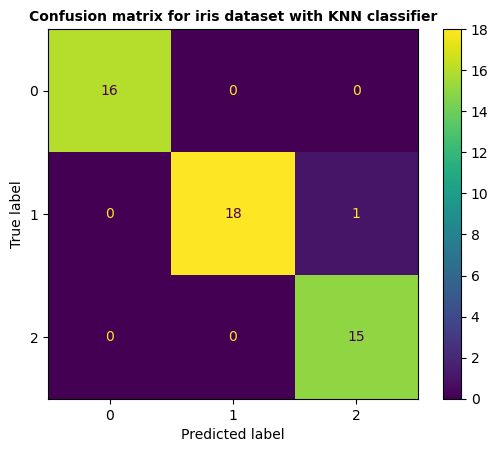

In [115]:
display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=classifier.classes_)
display.plot()
plt.title("Confusion matrix for iris dataset with KNN classifier" , weight = "bold" , size = 10)

In [116]:
print(f"accuracy score is {accuracy_score(y_test,y_pred):.2%}")
print(f"\nClassification reprot: \n{classification_report(y_test,y_pred)}")

accuracy score is 98.00%

Classification reprot: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



`Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in
sklearn.datasets.`

DEPRECATED: load_boston is deprecated in 1.0 and will be removed in 1.2.

The Boston housing prices dataset has an ethical problem. You can refer to the documentation of this function for further details.

The scikit-learn maintainers therefore strongly discourage the use of this dataset unless the purpose of the code is to study and educate about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original source

In [53]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [58]:
#separating dependent and independent features
X = data # independent features
y = target #target / dependent

In [59]:
#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size= 0.33 , random_state=0)

In [60]:
# Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()

In [61]:
# Training the model
regressor.fit(X_train , y_train)

KNeighborsRegressor()

In [62]:
# prediction on test set
y_pred = regressor.predict(X_test)

In [68]:
# Regression metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
print(f"Mean Absolute Error is {mean_absolute_error(y_test,y_pred):.2f}")
print(f"Mean Squared Error is {mean_squared_error(y_test,y_pred):.2f}")
print(f"R^2 score is {r2_score(y_test,y_pred):.2%}")

Mean Absolute Error is 4.09
Mean Squared Error is 37.20
R^2 score is 53.86%


`Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using
cross-validation on load_iris dataset in sklearn.datasets.`

In [69]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data # independent features
y = iris.target #target / dependent

In [70]:
#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size= 0.33 , random_state=0)

In [88]:
# Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
classifier = KNeighborsClassifier()
params = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10,20,30,40,50]}
clf = GridSearchCV(classifier,param_grid=params ,scoring="accuracy",cv=10 , verbose= 3)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END ....................n_neighbors=1;, score=0.900 total time=   0.0s
[CV 2/10] END ....................n_neighbors=1;, score=0.900 total time=   0.0s
[CV 3/10] END ....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 4/10] END ....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 5/10] END ....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 6/10] END ....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 7/10] END ....................n_neighbors=1;, score=0.900 total time=   0.0s
[CV 8/10] END ....................n_neighbors=1;, score=0.900 total time=   0.0s
[CV 9/10] END ....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 10/10] END ...................n_neighbors=1;, score=0.900 total time=   0.0s
[CV 1/10] END ....................n_neighbors=2;, score=0.800 total time=   0.0s
[CV 2/10] END ....................n_neighbors=

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                         40, 50]},
             scoring='accuracy', verbose=3)

In [99]:
print(f"Best value of k in KNN classifier is {clf.best_params_} ")
print(f"Best accuracy score is {clf.best_score_:.2%} ")

Best value of k in KNN classifier is {'n_neighbors': 5} 
Best accuracy score is 96.00% 


`Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in
sklearn.datasets.`

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
#separating dependent and independent features
X = data # independent features
y = target #target / dependent
#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size= 0.33 , random_state=0)

In [101]:
#feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [102]:
# Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [103]:
y_pred = regressor.predict(x_test_scaled)

In [104]:
# Regression metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
print(f"Mean Absolute Error is {mean_absolute_error(y_test,y_pred):.2f}")
print(f"Mean Squared Error is {mean_squared_error(y_test,y_pred):.2f}")
print(f"R^2 score is {r2_score(y_test,y_pred):.2%}")

Mean Absolute Error is 0.09
Mean Squared Error is 0.04
R^2 score is 93.29%


`Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on
load_iris dataset in sklearn.datasets.`

accuracy score is 98.00%

Classification reprot: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



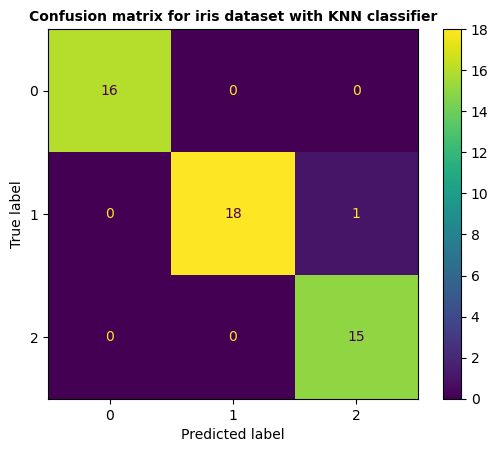

In [118]:
#loading the dataset
from sklearn.datasets import load_iris
iris = load_iris()


#separating dependent and independent features
X = iris.data # independent features
y = iris.target #target / dependent


#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size= 0.33 , random_state=0)


# Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(weights="distance") # KNN classifier with weighted voting 
# Done by setting the weights parameter to 'distance'. 
# This means that the weight of each vote is inversely proportional to 
# the distance between the test point and the training points.


# Training the model
classifier.fit(X_train , y_train)
# prediction on test set
y_pred = classifier.predict(X_test)
## Classification metrics
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report, ConfusionMatrixDisplay 
display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=classifier.classes_)
display.plot()
plt.title("Confusion matrix for iris dataset with KNN classifier" , weight = "bold" , size = 10)
print(f"accuracy score is {accuracy_score(y_test,y_pred):.2%}")
print(f"\nClassification reprot: \n{classification_report(y_test,y_pred)}")

`Q6. Implement a function to standardise the features before applying KNN classifier.`

accuracy score is 96.00%

Classification reprot: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



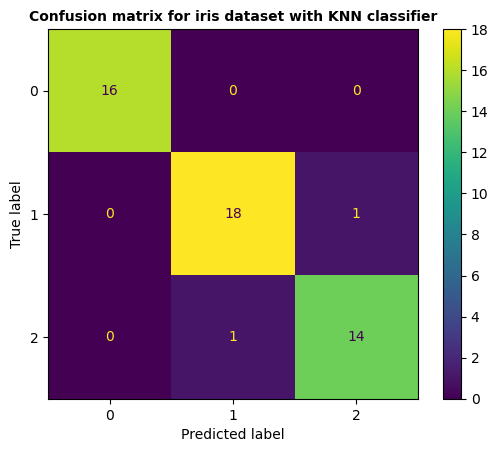

In [119]:
#loading the dataset
from sklearn.datasets import load_iris
iris = load_iris()


#separating dependent and independent features
X = iris.data # independent features
y = iris.target #target / dependent


#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size= 0.33 , random_state=0)


#Standradising the features using standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train) # standardising the X_train
x_test_scaled = scaler.transform(X_test) # standardising the X_test


# Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(weights="distance") # KNN classifier with weighted voting 
# Done by setting the weights parameter to 'distance'. 
# This means that the weight of each vote is inversely proportional to 
# the distance between the test point and the training points.


# Training the model
classifier.fit(x_train_scaled , y_train)
# prediction on test set
y_pred = classifier.predict(x_test_scaled)
## Classification metrics
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report, ConfusionMatrixDisplay 
display = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=classifier.classes_)
display.plot()
plt.title("Confusion matrix for iris dataset with KNN classifier" , weight = "bold" , size = 10)
print(f"accuracy score is {accuracy_score(y_test,y_pred):.2%}")
print(f"\nClassification reprot: \n{classification_report(y_test,y_pred)}")

`Q7. Write a Python function to calculate the euclidean distance between two points.`

In [145]:
def euclidean_distance(a,b):
    """input: a and b are 2 - D points with respective x and y co-ordinates represented as tuple
       output: Euclidean distance bewteen a and b is printed as a string
    """
    import math
    d = math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
    print(f"The euclidean distance between {a} and {b} is {d:.2f}")

    
euclidean_distance((4,5),(10,12))

The euclidean distance between (4, 5) and (10, 12) is 9.22


`Q8. Write a Python function to calculate the manhattan distance between two points.`

In [146]:
def manhattan_distance(a,b):
    """input: a and b are 2 - D points with respective x and y co-ordinates represented as tuple
       output: Manhattan distance bewteen a and b is printed as a string
    """

    d = abs(a[0]-b[0]) + abs(a[1]-b[1])
    print(f"The manhattan distance between {a} and {b} is {d}")

manhattan_distance((4,5),(10,12))

The manhattan distance between (4, 5) and (10, 12) is 13
